<a href="https://colab.research.google.com/github/Jirtus-sanasam/MLP-Diabetes/blob/main/Diabetes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
# Step1: Reading the Data
data1 = pd.read_csv("/content/diabetes_data2.csv")

In [ ]:
# Step2: Separating Independent and Dependent Variables
X = data1.drop("Outcome", axis=1)
Y = data1["Outcome"]
print(X.head().T)
print(Y.head().T)

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
# Step3: Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=24)

In [ ]:
# Step4: Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:

# Step5: Balance data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train_scaled, y_train)

unique, counts = np.unique(y_train_bal, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(402), np.int64(1): np.int64(402)}


In [ ]:
!pip uninstall -y sklearn-genetic sklearn_genetics


In [ ]:
!pip install -q sklearn-genetic-opt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 9.9 MB/s eta 0:00:00


In [ ]:
# Step 6: Feature Selection using Genetic Algorithm (GA)
# ⚠️ Run this cell AFTER Step 5 (SMOTE)

# ✅ Install sklearn-genetic in Colab


# --- Imports ---
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# ⚙️ Define the base estimator
# (use n_jobs=1 to avoid Colab multiprocessing conflict)
estimator = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)

# 🧬 Initialize Genetic Algorithm-based Feature Selector
selector = GAFeatureSelectionCV(
    estimator=estimator,
    cv=5,                   # 5-fold CV for fitness evaluation
    scoring='accuracy',     # accuracy as fitness score
    population_size=20,     # number of feature subsets per generation
    generations=10,         # number of generations
    n_jobs=-1,              # use all available cores
    verbose=True,           # show evolution logs
    keep_top_k=5,           # retain best 5 from each generation
    # random_state=42 # Removed random_state as it's not a valid argument
)

# 🧩 Fit selector on balanced + scaled training data
selector.fit(x_train_bal, y_train_bal)

# 🎯 Extract selected feature mask (True = selected)
selected_features_mask = selector.support_

# 🧾 Retrieve selected feature names if available
if isinstance(X, pd.DataFrame):
    selected_features = X.columns[selected_features_mask]
    print("\n✅ Selected Features by Genetic Algorithm:\n", list(selected_features))
else:
    print("\n⚠️ X is not a pandas DataFrame.")
    print("Selected feature indices:", np.where(selected_features_mask)[0])

# ✂️ Transform training & test data to include only selected features
x_train_selected = selector.transform(x_train_bal)
x_test_selected = selector.transform(x_test_scaled)

# 📊 Show data shape comparison
print("\n📊 Data Shape Comparison:")
print("Original training data:", x_train_bal.shape)
print("Selected training data:", x_train_selected.shape)
print("Original test data:", x_test_scaled.shape)
print("Selected test data:", x_test_selected.shape)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.724697	0.0626654  	0.820963   	0.613222   
1  	40    	0.800606	0.0237851  	0.828408   	0.742562   
2  	40    	0.802282	0.0355943  	0.828408   	0.711483   
3  	40    	0.804649	0.0338909  	0.828408   	0.714022   
4  	40    	0.810317	0.0254313  	0.828408   	0.736351   
5  	40    	0.797071	0.0587434  	0.828408   	0.615815   
6  	40    	0.820762	0.0247367  	0.828408   	0.714022   
7  	40    	0.819581	0.036529   	0.828408   	0.660512   
8  	40    	0.811247	0.0349801  	0.828408   	0.695388   
9  	40    	0.81722 	0.0403191  	0.828408   	0.644425   
10 	40    	0.828098	0.001352   	0.828408   	0.822205   

✅ Selected Features by Genetic Algorithm:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

📊 Data Shape Comparison:
Original training data: (804, 8)
Selected training data: (804, 7)
Original test data: (154, 8)
Selected test data: (154, 7)


In [ ]:
param_grid = {
    'hidden_layer_sizes': [
        (32,),
        (64,),
        (64, 32),
        (128, 64, 32)
    ],
    'activation': ['relu','tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp = MLPClassifier(
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    random_state=42
)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(
    estimator= mlp,
    param_grid= param_grid,
    scoring= 'accuracy',
    cv= 5,
    n_jobs= -1,
    verbose= 1
)

In [ ]:
grid_search.fit(x_train_selected, y_train_bal)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     n_iter_no_change=20, random_state=42,
                                     validation_fraction=0.2),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (64, 32),
                                                (128, 64, 32)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [ ]:
best_mlp = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated ROC-AUC:", grid_search.best_score_)


Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Best Cross-Validated ROC-AUC: 0.8122127329192546


In [ ]:
y_pred = best_mlp.predict(x_test_selected)
y_proba = best_mlp.predict_proba(x_test_selected)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7402597402597403
Test ROC-AUC: 0.7868075801749271

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        98
           1       0.64      0.66      0.65        56

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
 [[77 21]
 [19 37]]


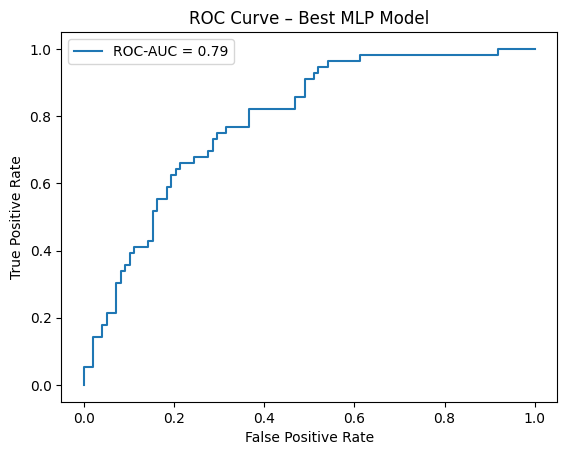

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Best MLP Model')
plt.legend()
plt.show()


In [ ]:
pip install shap


In [ ]:
best_mlp = grid_search.best_estimator_


In [ ]:
import shap
import numpy as np

# Create a small background sample for SHAP (to speed up computation)
background = shap.sample(x_train_selected, 100, random_state=42)

# Initialize SHAP Explainer with a callable function for prediction
# MLPClassifier does not have a direct 'predict' method that SHAP can call,
# so we wrap predict_proba (for probability estimates) or predict (for class labels)
# in a function that SHAP can use. predict_proba is usually preferred for explainability.
explainer = shap.Explainer(lambda x: best_mlp.predict_proba(x)[:, 1], background)

In [ ]:
# Compute SHAP values for the test set
shap_values = explainer(x_test_selected)


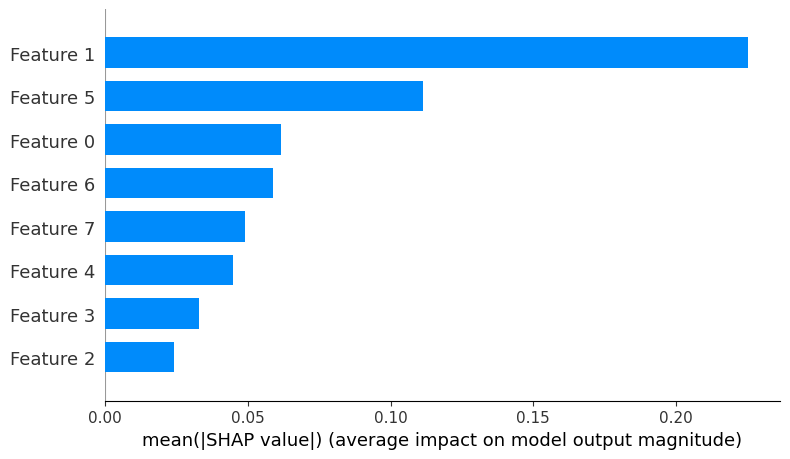

In [ ]:
shap.summary_plot(shap_values, x_test_selected, plot_type="bar")


In [ ]:
print(x_test_selected.shape)

(154, 8)
